Vamos a ver formas de resolver problemas NP completos. No vamos a poder resolver problemas NP completos en todos los casos, pero se puede relajar un poco como sigue:
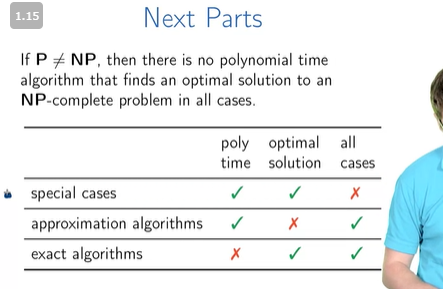

# Casos Especiales
#### 2-SAT
Es un conjunto de clauses de una f'ormula CNF en la que cada clause tiene a lo sumo dos literales y buscamos obtener valores para las variables que sean validos. <br>


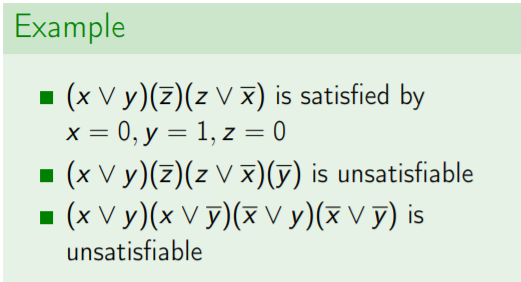
Dado un 2-SAT, podemos construir su $\textbf{Implication Graph}$ como sigue: <br>
1) Para cada variable x, ponemos dos nodos x y -x <br>
2) Para cada 2-clause (l_1 V l_2) introducimos los ejes -l_1 -> l_2  , -l_2 -> l_1 <br>
3) Para cada 1-clause (l), introducimos el eje -l -> l<br>

Por ejemplo:
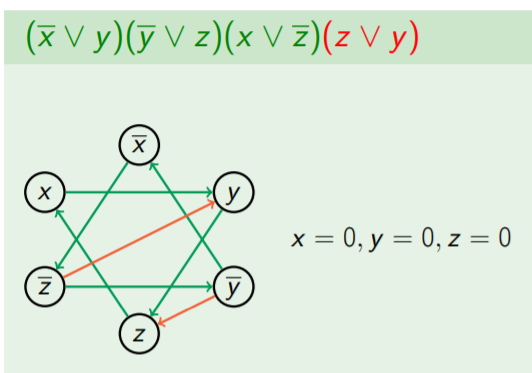
Entonces, una solucion al problema va a ser una asignacion a las variables x,y,z tal que se cumplen todas las implicaciones, es decir, tal que nunca se tiene un 1 que es llevado a un 0. (aqu'i vemos como falla la grafica porque 0->1 en -z -> y. <br>
Esto porque para que (l_1 V l_2), debemos de tener que si -l_1 es cierto, entonces l_2 tambien y si -l_2 es cierto entonces l_1 tambien. Y adem'as, si tenemos un eje (l), debe de ser verdadero, por lo que no podemos tener -l = 1. Por eso los problemas son equivalentes. <br><br>
$\textbf{Anti-Sim'etrico}$: En el implication graph construido como ahora, si existe un camino de l_1 a l_2, entonces existe un camino de -l_2 a -l_1. <br><br> 
$\textbf{Transitividad:}$ Si todos los ejes est'an satisfechos por una asignacion a las variables y hay un camino de l_1 a l_2, entonces no se puede tener que l_1 = 1 y l_2 = 0. (por lo que tambien hay un tipo de implicacion entre ejes no adyacentes pero conectados). <br>
Esto  porque si l_1 = 1 , entonces el adyacente vale 1 y el siguiente adyacente vale 1, .... , y as'i con todos los conectados a l_1. <br> <br> 



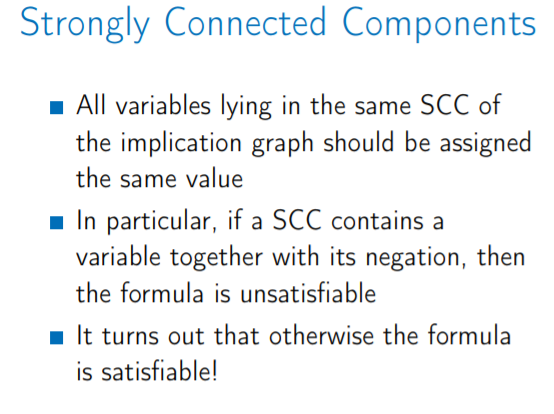
Recordar que dos elementos u, v est'an en el mismo SCC sii u est'a conectado a v y vice versa

Entonces esto nos da una idea de un algoritmo para checar si un 2-CNF es satisfacible.  Basicamente construimos la implication graph y calculamos sus SCC. Luego, vemos para todo x si x y su negacion est'an en el mismo SCC (y usamos que el 2-SAT es satisfacible sii cada SCC no contiene a ningun vertice y su negacion). Luego, para encontrar las asignaciones, ordenamos los SCC topologicamente en orden inverso.
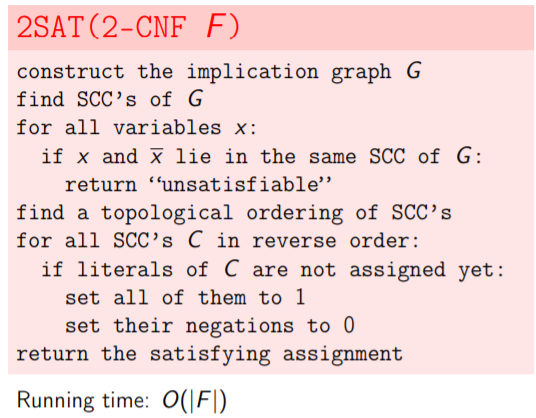

Lema (El Algoritmo sirve): Cuando una literal se pone 1, todas las literales a las que se puede llegar desde el son 1 (porque hacemos SCC en orden topologico inverso). Cuando una literal se pone 0, todas literales a las que se puede llegar desde ah'i son 0 (por antisimetria). 

#### Independent Sets in Trees
Nos dan un arbol y queremos encontrar un subconjunto de vertices del max tamano posible tal que ninguna pareja son adyacentes.
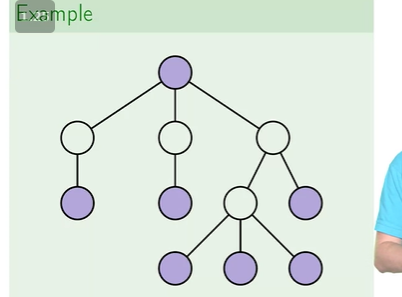

Este problema se puede resolver con un greedy algorythm en el que simplemente se van tomando todas las hojas del arbol. <br>


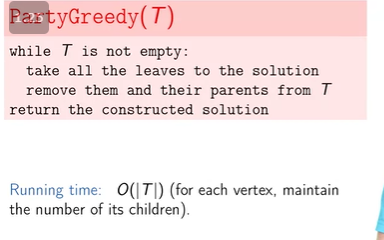
Lo de mantain number of children es solamente para no sacar de verdad las leafs del arbol y sus padres, sino que cada nodo tiene el numero de hijos y al sacar un nodo, el numero puede disminuir<br><br>

$\textbf{Problema m'as elaborado}$: Ahora digamos que cada elemento del arbol tiene un peso y buscamos encontrar el subconjunto de vertices sin elementos adyacentes con max peso.

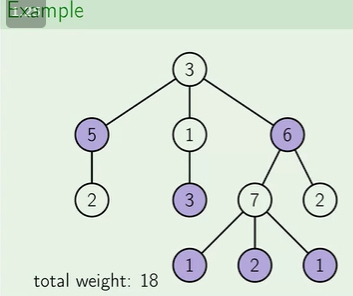

Este problema no se puede resolver con greedy pero se puede resolver con dinamico.

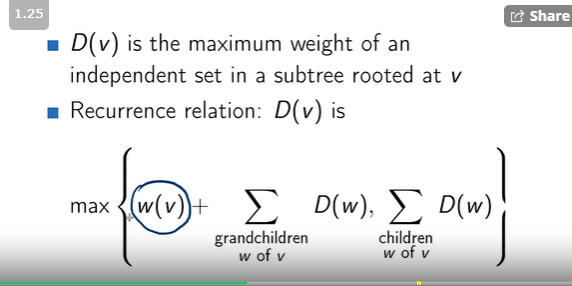
Para cada v, hay dos posibilidades, o incluimos a v o no. Si incluimos a v, entonces el peso total es w(v) + la solucion optima de los nietos de v (los hijos no porque son adyacentes). Si no incluimos a v, entonces lo mejor es sumar las soluciones optimas de los hijos y ya. <br>


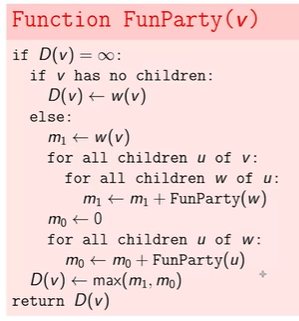
el tiempo es O(|T|)

# Algoritmos Exactos

##### 3-SAT Problem
Tenemos muchos clauses de un CNF cada uno con 3 literales. <br>
Un algoritmo naive va por todas las soluciones y checa si satisface o no, un algoritmo as'i toma un tiempo O(|F| 2^n). <br>
Sin embargo, podemos mejorarlo un poco evitando ir por todas las posibilidades con nu m'etodo llamado backtracking. <br>
Consiste en in construyendo la solucion paso por paso hasta que nos damos cuenta que no podemos extender la solucion a una solucion valida, en ese caso hacemos un backtracking
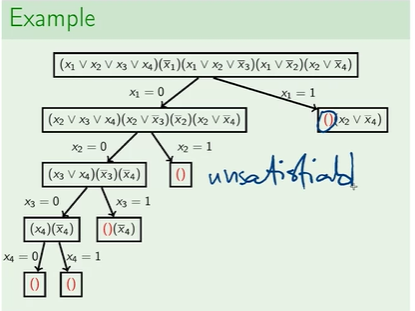
Notar que no fue necesario considerar todas las posibilidades

Algoritmo
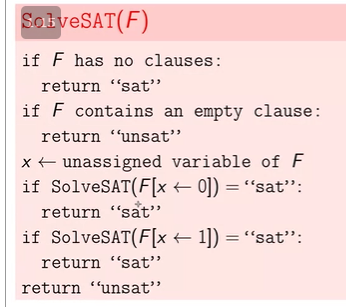
Donde F[x <- 0] significa checar el CNF poniendo x=0, eso significa que todas las clauses con x hay que quitar la x del clause y todas las clauses con -x ya est'an satisfechas por lo que las quitamos. <br>
SAT solvers usan este tipo de algoritmos con muchas mejoras. Sin embargo, aunque puede ser muy eficiente, no es un algoritmo polinomial. <br><br>

######  Local Search (Para resolver 3-SAT)
Empezamos con una solucion elegida medio al azar (un truth assignment para todas las variables x1,x2, ...). Luego, si esta eleccion no funciona, elegimos una solucion candidata cercana (donde la cercania se define como la cantidad de bits distintos). 

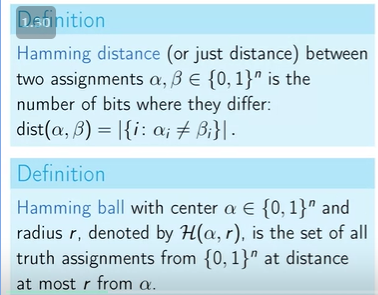
Lema: si H(a,r) contiene una solucion del 3-SAT. Podemos encontrar una solucion en un tiempo O(|F| * 3^r) <br>


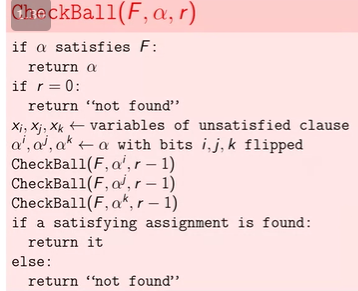

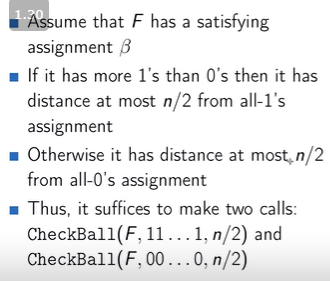
Esto hace que el algoritmo tenga un tiempo O(|F|3^(n/2)) que es m'as r'apido que checar todas las respuestas, que lleva un tiempo O(|F|2^n)

### Traveling Salesman Problem (TSP)
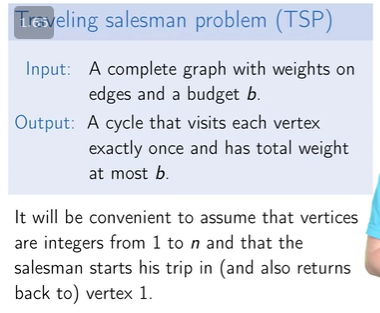!

Un algoritmo naive brute force tiene que checar los (n-1)! ciclos. Que es muy malo.  <br>
Hay un algoritmo din'amico para resolver el problema en tiempo O(n^2 * 2^n) con programacion dinamica. <br>
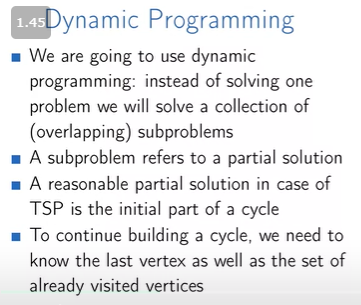

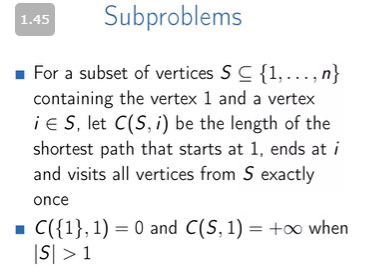

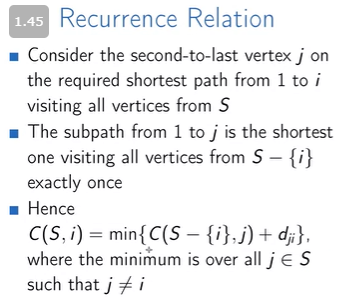

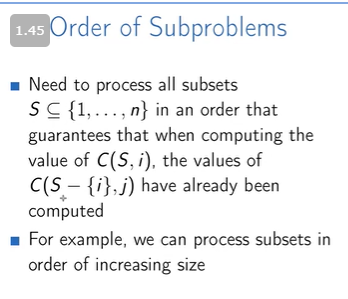

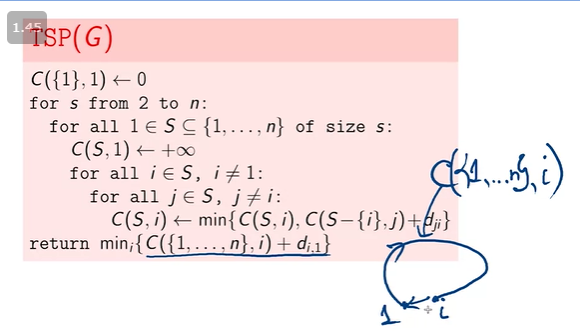

# Approximation Algorithms

### Vertex Cover
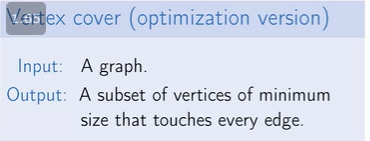 

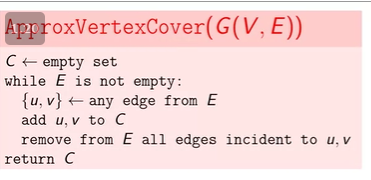
Es un algoritmo 2-aproximado, lo que significa que la solucion es a lo sumo dos veces mayor que la solucion optima. Sin embargo, es una solucion lineal, por lo que no est'a tan mal

### Metric Traveling Salesman
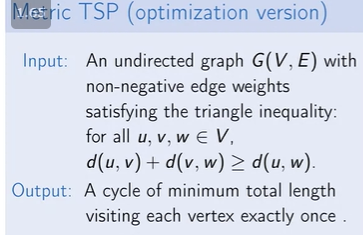
Vamos a disenar un algoritmo polinomial que no da la solucion optima pero da una oslucion a lo sumo 2 veces peor que la optima


El primer paso es construir el MST (minimum spanning tree), arbol que contiene a todos los vertices.
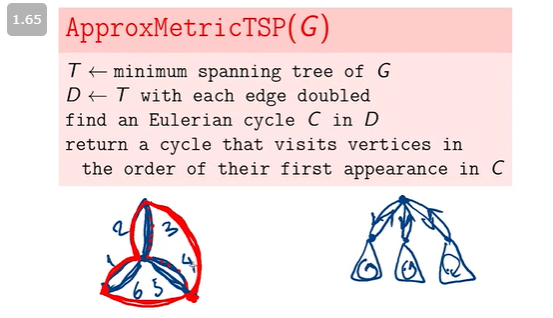

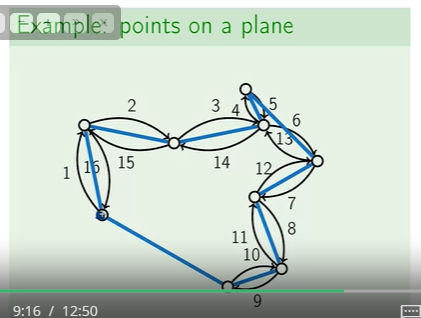
Se puede demostrar que este algoritmo da una solucion a lo mucho 2 veces peor que la optima.